In [124]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt


***https://data.sfgov.org/Economy-and-Community/Map-of-Schools/qb37-w9se***

Query from API

In [125]:
from requests.auth import HTTPBasicAuth
data = requests.get('https://data.sfgov.org/resource/qb37-w9se.json')

In [126]:
json = data.json()
df = pd.DataFrame.from_dict(json)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lower_grade          445 non-null    object
 1   campus_address       445 non-null    object
 2   county_fips          445 non-null    object
 3   supervisor_district  445 non-null    object
 4   lower_age            445 non-null    object
 5   category             445 non-null    object
 6   map_label            445 non-null    object
 7   county_name          445 non-null    object
 8   ccsf_entity          445 non-null    object
 9   grade_range          445 non-null    object
 10  general_type         445 non-null    object
 11  upper_age            445 non-null    object
 12  upper_grade          445 non-null    object
 13  campus_name          445 non-null    object
 14  location_1           445 non-null    object
 15  cds_code             403 non-null    object
dtypes: objec

In [128]:
df.columns

Index(['lower_grade', 'campus_address', 'county_fips', 'supervisor_district',
       'lower_age', 'category', 'map_label', 'county_name', 'ccsf_entity',
       'grade_range', 'general_type', 'upper_age', 'upper_grade',
       'campus_name', 'location_1', 'cds_code'],
      dtype='object')

In [129]:
df = df[['campus_name', 'campus_address','lower_grade', 'upper_grade', 'supervisor_district',\
       'lower_age', 'upper_age', 'map_label', 'ccsf_entity','grade_range', 'general_type',\
        'location_1']]

Tranforming categorical data and numerical data

In [130]:
df[['map_label', 'ccsf_entity', 'grade_range', 'general_type']] = df[['map_label', 'ccsf_entity', 'grade_range', 'general_type']].apply(lambda x: x.astype('category'))
df[['lower_grade', 'upper_grade', 'supervisor_district', 'lower_age', 'upper_age']] = df[['lower_grade', 'upper_grade', 'supervisor_district', 'lower_age', 'upper_age']].apply(lambda y: y.astype(int))

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   campus_name          445 non-null    object  
 1   campus_address       445 non-null    object  
 2   lower_grade          445 non-null    int64   
 3   upper_grade          445 non-null    int64   
 4   supervisor_district  445 non-null    int64   
 5   lower_age            445 non-null    int64   
 6   upper_age            445 non-null    int64   
 7   map_label            445 non-null    category
 8   ccsf_entity          445 non-null    category
 9   grade_range          445 non-null    category
 10  general_type         445 non-null    category
 11  location_1           445 non-null    object  
dtypes: category(4), int64(5), object(3)
memory usage: 51.4+ KB


In [132]:
df.head()

,campus_name,campus_address,lower_grade,upper_grade,supervisor_district,lower_age,upper_age,map_label,ccsf_entity,grade_range,general_type,location_1
0,"Milk, Harvey Milk Childrens Center","841 ELLIS ST, SAN FRANCISCO CA 94117",-2,-1,6,3,4,CDC095,SFUSD,PK,CDC,"{'latitude': '37.783802', 'human_address': '{""..."
1,Mckinley Elementary School,"1025 14TH ST, San Francisco, CA 94114",0,5,8,5,10,PS075,SFUSD,K-5,PS,"{'latitude': '37.766884', 'human_address': '{""..."
2,Jewish Community Center San Francisco - Rosenb...,"325 ARGUELLO BLVD, SAN FRANCISCO, CA 94118",-2,-1,1,3,4,CDC058,Private,PK,CDC,"{'latitude': '37.784588', 'human_address': '{""..."
3,Eureka Learning Center,"464 DIAMOND ST, SAN FRANCISCO, CA 94114",-2,-1,8,3,4,CDC035,Private,PK,CDC,"{'latitude': '37.754967', 'human_address': '{""..."
4,Noriega Early Education School,"1775 44TH AVE, San Francisco, CA 94122",-2,5,4,3,10,PS085,SFUSD,PK-5,PS,"{'latitude': '37.753834', 'human_address': '{""..."


Is there any duplicated campus names?

In [133]:
print('Number of lines: {0}. \nNumber of Unique Campus names : {1}'.format(df.shape[0] , df.campus_name.nunique()))

Number of lines: 445. 
Number of Unique Campus names : 440


Ans: Yes, there are duplicated Campus Name.

Who are they?

In [134]:
df.groupby(['campus_name'])['ccsf_entity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(4)

,campus_name,count
80,Cornerstone Academy,3
55,Chinese American International School,2
33,Bright Horizons - Pacific Gas And Electric,2
228,Lycee Francais De San Francisco,2


In [135]:
mask = df.groupby(['campus_name'])['ccsf_entity'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(4)['campus_name']

In [136]:
(df.query('campus_name in @mask').sort_values('campus_name'))

,campus_name,campus_address,lower_grade,upper_grade,supervisor_district,lower_age,upper_age,map_label,ccsf_entity,grade_range,general_type,location_1
50,Bright Horizons - Pacific Gas And Electric,"77 BEALE ST, SAN FRANCISCO, CA 94105",-2,4,6,6,10,IND221,Private,PK-K,IND,"{'latitude': '37.791763', 'human_address': '{""..."
281,Bright Horizons - Pacific Gas And Electric,"77 BEALE ST, SAN FRANCISCO, CA 94105",-2,4,6,3,5,IND220,Private,1-4,IND,"{'latitude': '37.791672', 'human_address': '{""..."
58,Chinese American International School,"42 WALLER ST, SAN FRANCISCO, CA 94102",-2,-1,5,3,4,CDC014,Private,PK,CDC,"{'latitude': '37.772228', 'human_address': '{""..."
291,Chinese American International School,"150 OAK ST, SAN FRANCISCO, CA 94102",0,8,5,5,13,IND227,Private,K-8,IND,"{'latitude': '37.775429', 'human_address': '{""..."
68,Cornerstone Academy,"801 SILVER AVE, SAN FRANCISCO, CA 94134",0,5,9,5,10,IND233,Private,K-5,IND,"{'latitude': '37.729584', 'human_address': '{""..."
83,Cornerstone Academy,"501 CAMBRIDGE ST, SAN FRANCISCO, CA 94134",6,12,9,11,17,IND232,Private,6-12,IND,"{'latitude': '37.724953', 'human_address': '{""..."
297,Cornerstone Academy,"1925 LAWTON ST, SAN FRANCISCO, CA 94134",-2,-1,4,3,4,CDC019,Private,PK,CDC,"{'latitude': '37.75742', 'human_address': '{""a..."
188,Lycee Francais De San Francisco,"755 ASHBURY ST, SAN FRANCISCO, CA 94117",-2,5,5,3,10,IND270,Private,PK-5,IND,"{'latitude': '37.767971', 'human_address': '{""..."
190,Lycee Francais De San Francisco,"1201 ORTEGA ST, SAN FRANCISCO, CA 94122",6,12,4,11,17,IND269,Private,6-12,IND,"{'latitude': '37.751988', 'human_address': '{""..."


It`s possible to notice the school as split for different age groups, and some report to different districts, even though they are from the same school "chain"

<AxesSubplot: xlabel='ccsf_entity', ylabel='count'>

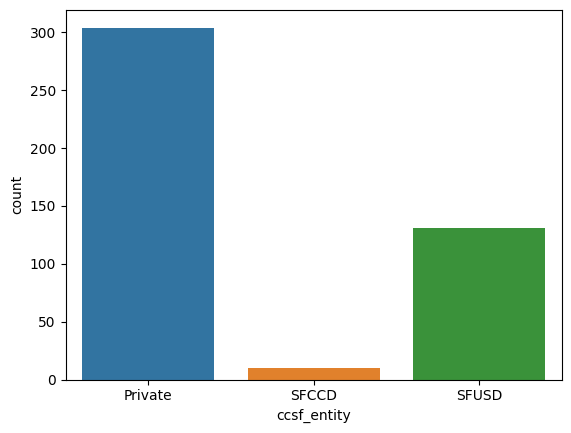

In [137]:
sns.countplot(data=df, x='ccsf_entity')

SFUSD = San Francisco Unified School District and SFCCD = San Francisco Community College District 

Distribution of CCSF Entitites per district.


<AxesSubplot: xlabel='ccsf_entity', ylabel='count'>

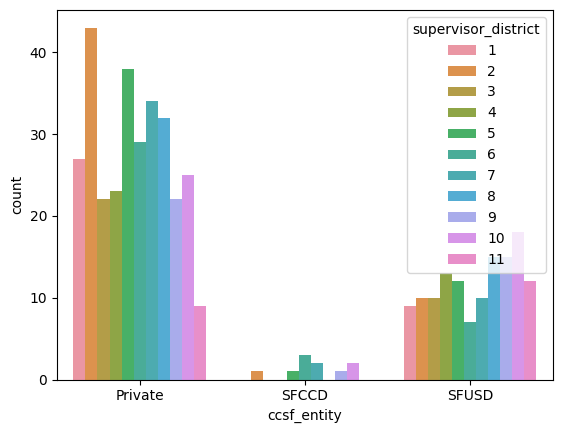

In [141]:
sns.countplot(data=df, x='ccsf_entity', hue = 'supervisor_district')

Possible to observe that SFCCD, Comunity colleges are come concetrated into the district 5, 6 and 7. while privates and SFUSD have a bigger coverage

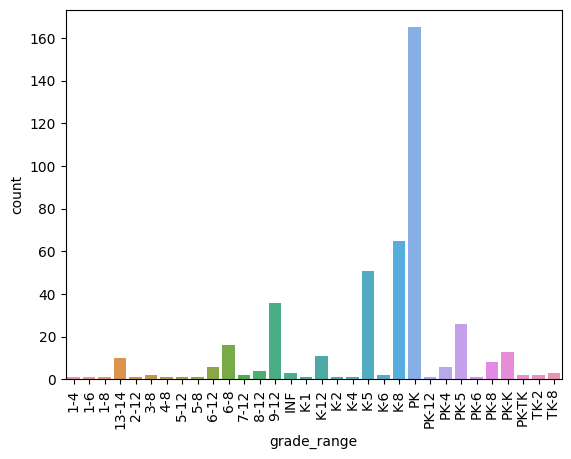

In [165]:
sns.countplot(data=df, x='grade_range')
plt.xticks(rotation=90)
None

The most common schools are the Preschool / Kindergarden

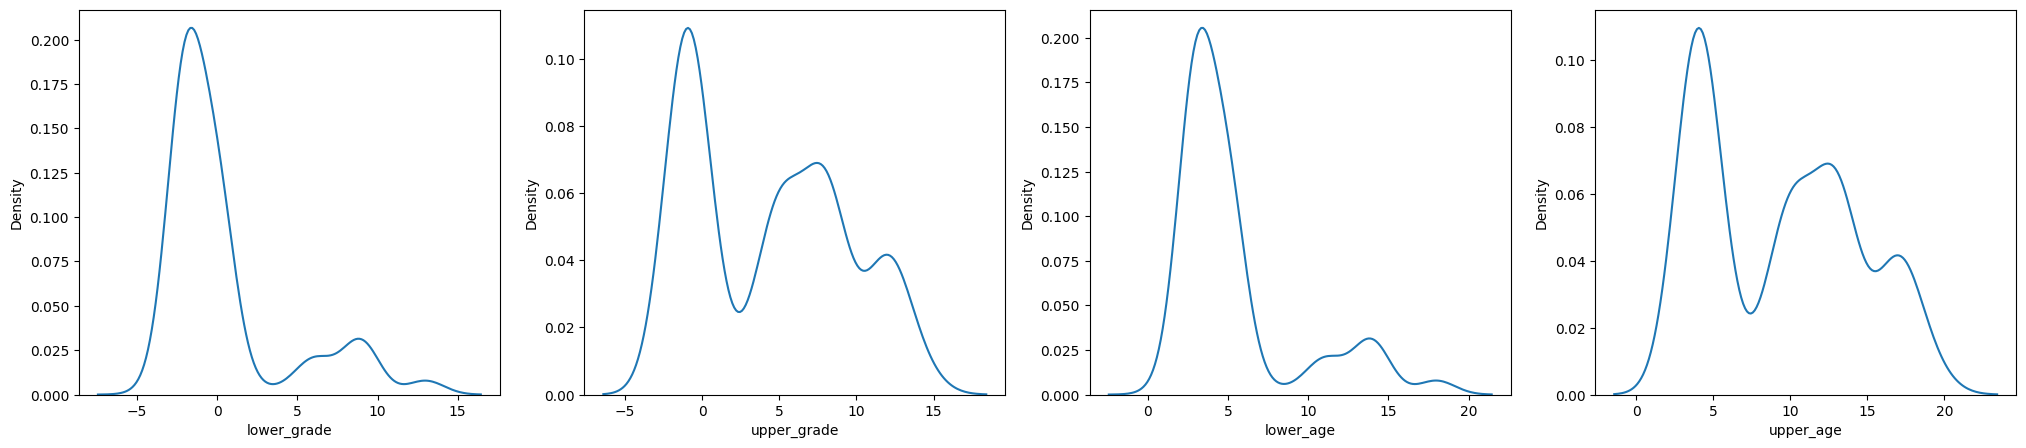

In [168]:
categories = ['lower_grade', 'upper_grade', 'lower_age', 'upper_age']

figs,axs = plt.subplots(ncols=len(categories), figsize=(25,5))
i=0
for cat in categories:
    sns.kdeplot(data=df[cat], ax=axs[i])
    i += 1